In [109]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 
from numpy import nan

In [110]:
f = pd.read_excel('dane.xlsx')

In [111]:
p = [f[f.columns[x]].values.tolist() for x in range(7)]
t=p[-1]
p.remove(t)
k=[[float(str(x)[:-1]) for x in y if str(x) != "nan"] for y in p]
p=k
p[1].pop(3)
p[1].pop(3)

67.0

In [112]:
c=[3,5,23,28,6,6]
g=[p[i][c[i]] for i in range(len(p))]
c=[10,-6,33,38,35,37]
d=[p[i][c[i]] for i in range(len(p))]

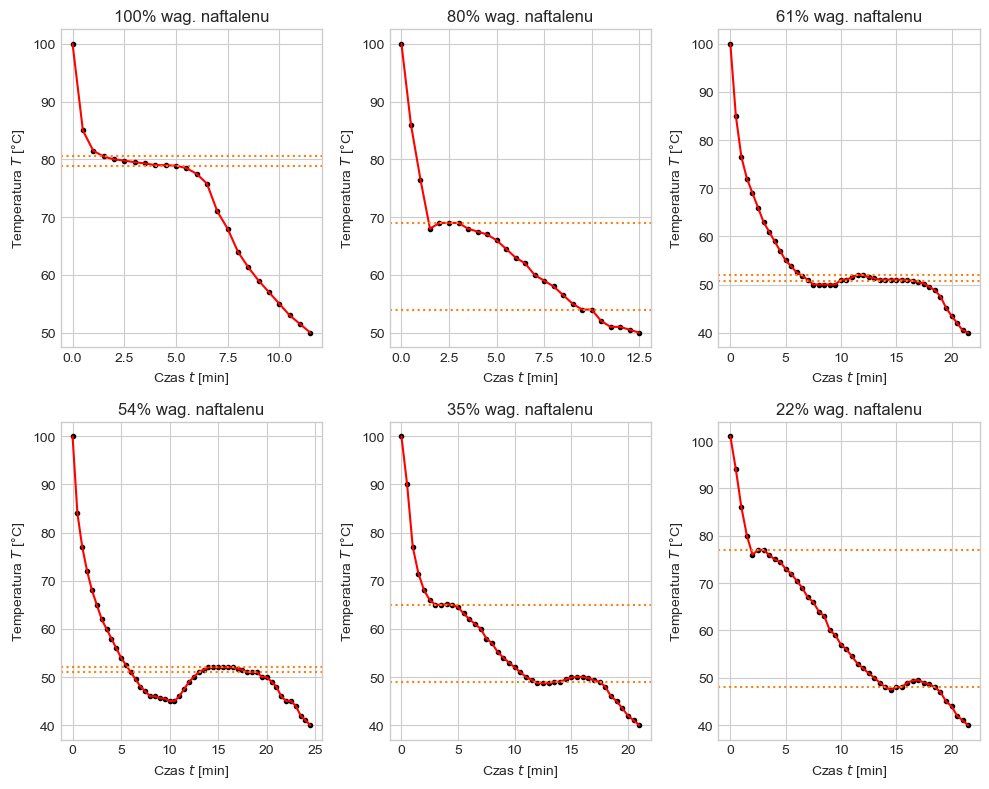

In [113]:
tytuły=['100%','80%','61%','54%','35%','22%']
plt.figure(figsize=(10,8))
for i in range(len(p)):
    plt.subplot(2,3,i+1)
    plt.scatter(t[0:len(p[i])],p[i],color='k',marker='.')
    plt.plot(t[0:len(p[i])],p[i],color='r')
    plt.axhline(y = g[i], color = 'C1', linestyle = ':')
    plt.axhline(y = d[i], color = 'C1', linestyle = ':')
    plt.style.use('seaborn-whitegrid')
    plt.xlabel("Czas $t$ [min]")
    plt.ylabel("Temperatura $T$ [°C]")
    plt.title(tytuły[i]+' wag. naftalenu')
    plt.tight_layout()
plt.show()

In [114]:
M_naft=	128.19
M_acenaft=154.21
k=np.array([100,80,61,54,35,22])
k=k/100
chi_naft=1-(1/(1+(k*M_acenaft/(M_naft*(1-k)))))
chi_naft

C:\Users\Mikołaj Prokopski\AppData\Local\Temp\ipykernel_18620\1017087087.py:5: RuntimeWarning: divide by zero encountered in true_divide
  chi_naft=1-(1/(1+(k*M_acenaft/(M_naft*(1-k)))))


array([1.        , 0.82793981, 0.65296865, 0.58543962, 0.39311493,
       0.25334243])

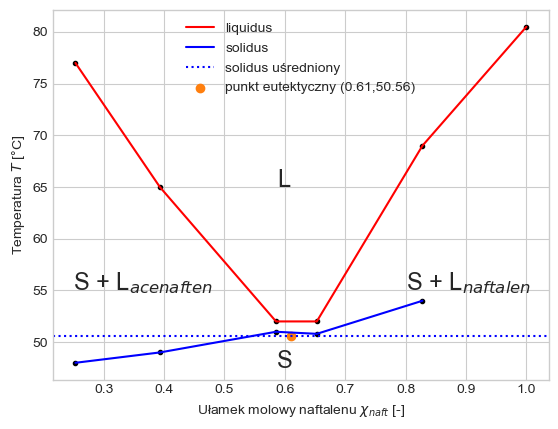

In [115]:
plt.scatter(chi_naft,g,color='k',marker='.')
plt.plot(chi_naft,g,color='r',label='liquidus')
plt.scatter(chi_naft[1:],d[1:],color='k',marker='.')
plt.plot(chi_naft[1:],d[1:],color='b',label='solidus')
plt.axhline(y = np.mean(np.array(d[1:])), color = 'b', linestyle = ':', label="solidus uśredniony")
plt.style.use('seaborn-whitegrid')
plt.xlabel("Ułamek molowy naftalenu $\chi_{naft}$ [-]")
plt.ylabel("Temperatura $T$ [°C]")
f=17
plt.text(0.587,65,'L', fontsize=f)
plt.text(0.25,55,'S + L$_{acenaften}$',fontsize=f)
plt.text(0.80,55,'S + L$_{naftalen}$',fontsize=f)
plt.text(0.587,47.5,'S',fontsize=f)
plt.scatter(0.61,np.mean(np.array(d[1:])),color='C1',label=f'punkt eutektyczny (0.61,{np.mean(np.array(d[1:]))})')
plt.legend(loc="best")
plt.show()